In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation, metrics

/Users/Roman/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("train_without_oversampling.csv")
test = pd.read_csv("test.csv")

In [3]:
y = train.target
train.drop(["target","client_id"], axis=1, inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170745 entries, 0 to 170744
Data columns (total 44 columns):
gender                  170745 non-null int64
age                     170745 non-null int64
credit_sum              170745 non-null float64
credit_month            170745 non-null int64
tariff_id               170745 non-null float64
score_shk               170745 non-null float64
monthly_income          170745 non-null float64
credit_count            170745 non-null float64
overdue_credit_count    170745 non-null float64
high_edu                170745 non-null bool
not_work                170745 non-null bool
usual_workers           170745 non-null bool
head_workers            170745 non-null bool
have_business           170745 non-null bool
single                  170745 non-null bool
education_GRD           170745 non-null int64
education_PGR           170745 non-null int64
education_SCH           170745 non-null int64
education_UGR           170745 non-null int64
job_posit

In [5]:
train_data, test_data, y_train, y_test = train_test_split(train, y, test_size = 0.25, stratify = y)

In [6]:
rf = ensemble.RandomForestClassifier(n_estimators=250, class_weight="balanced", max_features='auto', n_jobs=-1)
rf.fit(train_data, y_train)
preds = rf.predict(test_data)
print metrics.roc_auc_score(y_test, preds)

0.528524842881


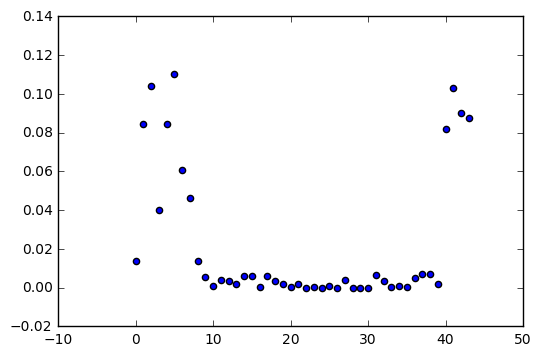

In [7]:
plt.scatter(x = np.arange(len(train_data.columns)), y=rf.feature_importances_)

In [8]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

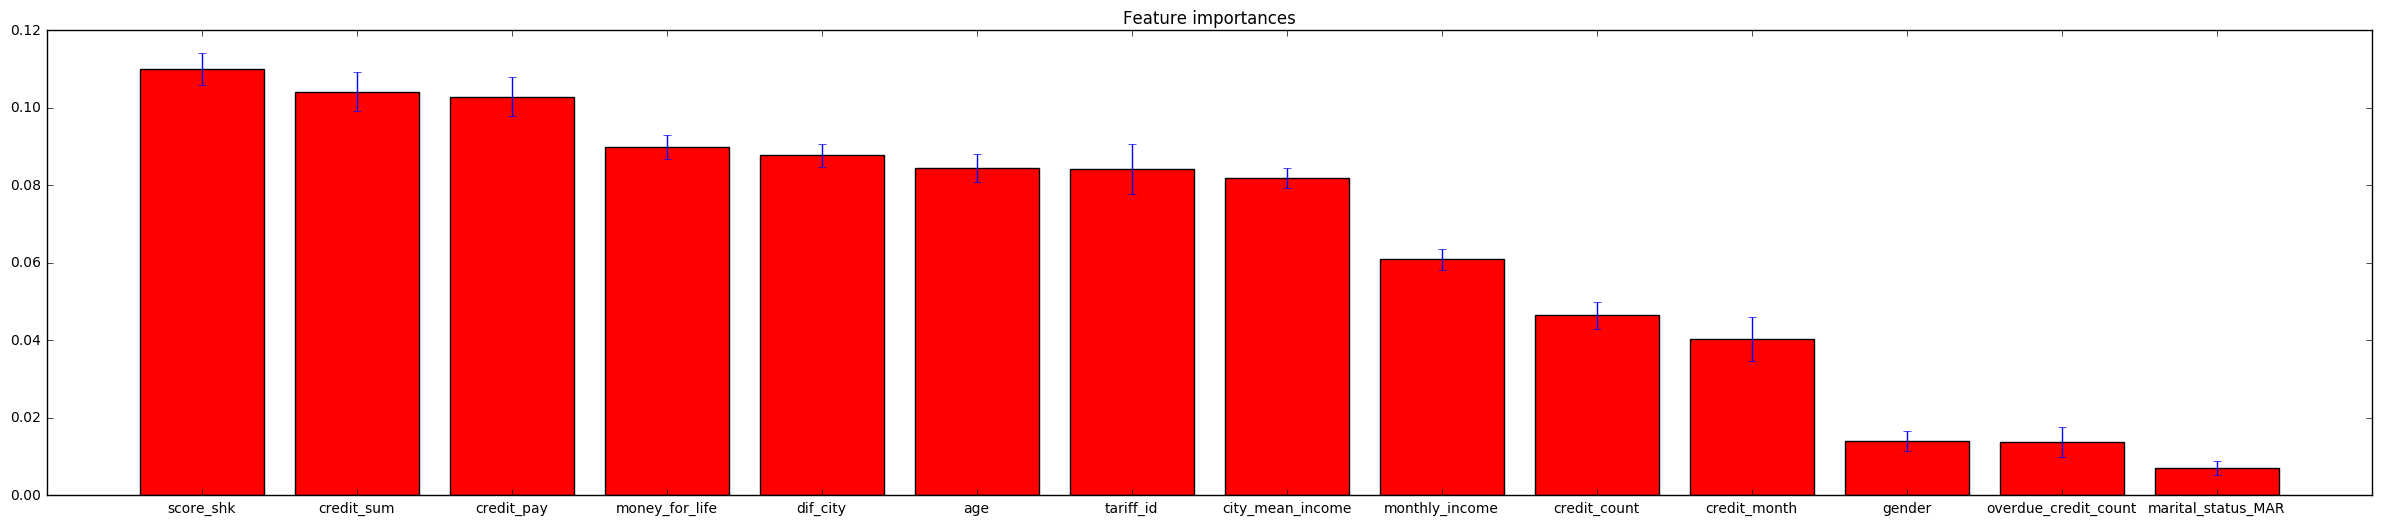

In [11]:
plt.figure(figsize=(30,6))
plt.title("Feature importances")
plt.bar(range(14), importances[indices][:14],
       color="r", yerr=std[indices][:14], align="center")
plt.xticks(range(14), train_data[indices[:14]])
plt.xlim([-1, 14])
plt.show()

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          9.00000000e+00,   1.60000000e+01,   2.10000000e+01,
          2.90000000e+01,   4.70000000e+01,   3.60000000e+01,
          6.20000000e+01,   9.20000000e+01,   1.25000000e+02,
          1.72000000e+02,   2.09000000e+02,   2.64000000e+02,
          3.30000000e+02,   4.36000000e+02,   4.87000000e+02,
          5.87000000e+02,   6.85000000e+02,   8.01000000e+02,
          9.36000000e+02,   1.07200000e+03,   1.21400000e+03,
          1.43900000e+03,   1.55400000e+03,   1.73100000e+03,
          1.90300000e+03,   2.12800000e+03,   2.37300000e+03,
          2.49700000e+03,   2.66300000e+03,   2.82700000e+03,
        

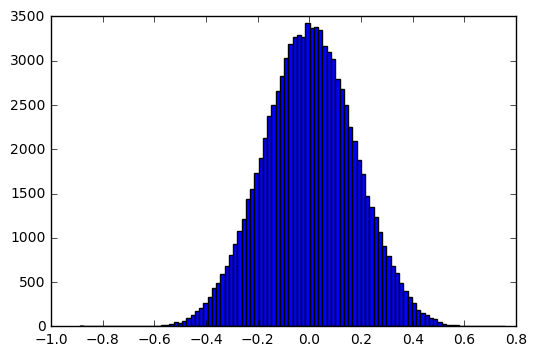

In [12]:
plt.hist(np.diff(test.score_shk), bins=100)